## Plot the effect of distance (Experiment 5)
- Read from files in the data path 
- Plot avg throughput and avg jitter 
- data path : 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

# Input Data Path

In [2]:
entries = '/Users/kalika/PycharmProjects/Privacy_SDN_Edge_IoT/PlanB/Experiment5/'
distance = ['5cm.csv','50cm.csv','100cm.csv','200cm.csv','300cm.csv','400cm.csv','500cm.csv','750cm.csv']


In [3]:
def getDatafromTxT(filename, headerrange):
    """
    Get dataframe from txt file:
    filename : xxx.txt
    headerrange : number of lines that needed to be removed. 
    
    return : df : datafame type
    """
    h = headerrange + 1
    skip_1 = list(range(0,h, 1))
    df = pd.read_csv(filename,
        skiprows=skip_1,
        header=None,
        delimiter=',',
        skipinitialspace=True,
        error_bad_lines=False)
    return df

In [4]:
def getCSVfileneme(entries,distance):
    """
    Collect dataframe in a list 
    Input: 
        entries : '/datapath/'
        distance : ['5cm.csv','50cm.csv','100cm.csv','200cm.csv','300cm.csv','400cm.csv','500cm.csv','750cm.csv'] 
    Output: 
        df_file : [csv1,csv2,...]        
    """
    filecsv = []
    for f_name in os.listdir(entries):
        if f_name.endswith('.csv'):
            filecsv.append(f_name)
    df_file = []
    DF_list= list()
    i = 0
    for d in distance:
        for f in filecsv:
            ff = f.split('_')
            if ff[1] == d:
                df_file.append(f)
    return df_file
        
    

In [5]:
df_file = getCSVfileneme(entries,distance)

In [6]:
print(df_file)

['test5_5cm.csv', 'test5_50cm.csv', 'test5_100cm.csv', 'test5_200cm.csv', 'test5_300cm.csv', 'test5_400cm.csv', 'test5_500cm.csv', 'test5_750cm.csv']


In [7]:
avgThr = []
varThr = []
avgJitter = []
varJitter = []

for d in df_file:
    df = getDatafromTxT(d, 0)
    print(df.head)
    df = df.drop(df.columns[[6,7]], axis=1)  
    df.rename({1 :'Interval', 2 : 'Transfer', 3 :'Bitrate', 4 :'Jitter', 5 :'Lost/Total Datagrams'}, axis=1, inplace=True)


    time = np.array(range(len(df.index)))

    df['Time'] = time
    df['Time'] = df['Time'].astype(int) 

    
    # avergae throughput 
    sumThroughput = df['Bitrate'].sum()
    avgSumThroughput = sumThroughput/len(time)
    print('avg Throughput :', avgSumThroughput)
    print('var Throughput :', df['Bitrate'].var())
    
    avgThr.append(avgSumThroughput)
    varThr.append(df['Bitrate'].var())
    
    # avergae jitter 
    df['Jitter'] = df['Jitter'].astype(float) 
    sumJitter = df['Jitter'].sum()
    avgSumJitter = sumJitter/len(time)
    print('avg Jitter :', avgSumJitter)
    print('var Jitter :', df['Jitter'].var())
    
    
    avgJitter.append(avgSumJitter)
    varJitter.append(df['Jitter'].var())
    

<bound method NDFrame.head of        0            1     2     3      4       5    6    7
0      1    1.00-2.00  3.98  33.4  0.672  0/2884 -1.0 -1.0
1      2    2.00-3.00  4.02  33.7  0.773  0/2908 -1.0 -1.0
2      3    3.00-4.00  4.03  33.8  0.507  0/2918 -1.0 -1.0
3      4    4.00-5.00  4.01  33.7  0.522  0/2905 -1.0 -1.0
4      5    5.00-6.00  3.93  33.0  0.691  0/2847 -1.0 -1.0
..   ...          ...   ...   ...    ...     ...  ...  ...
284  366  24.00-25.00  3.88  32.5  0.507  0/2810 -1.0 -1.0
285  367  25.00-26.00  3.86  32.4  0.631  0/2797 -1.0 -1.0
286  368  26.00-27.00  3.93  33.0  0.579  0/2849 -1.0 -1.0
287  369  27.00-28.00  3.97  33.3  0.613  0/2876 -1.0 -1.0
288  370  28.00-29.00  3.92  32.9  0.650  0/2842 -1.0 -1.0

[289 rows x 8 columns]>
avg Throughput : 32.63840830449827
var Throughput : 0.8921655132641261
avg Jitter : 0.5963564013840831
var Jitter : 0.028683639898116096
<bound method NDFrame.head of        0            1     2     3      4       5    6    7
0      1   

In [8]:
print('avg Jitter = ',avgJitter)
print('avg Throughput = ',  avgThr)

avg Jitter =  [0.5963564013840831, 0.6009550173010381, 0.6017266435986159, 0.6178581314878892, 0.6321764705882353, 0.6294671280276817, 0.7205847750865053, 0.9687889273356401]
avg Throughput =  [32.63840830449827, 32.72906574394464, 32.391003460207614, 31.07854671280277, 30.451211072664357, 30.254671280276817, 28.455363321799304, 22.16993079584775]


## Plot graph

Text(0, 0.5, 'Jitter (sec)')

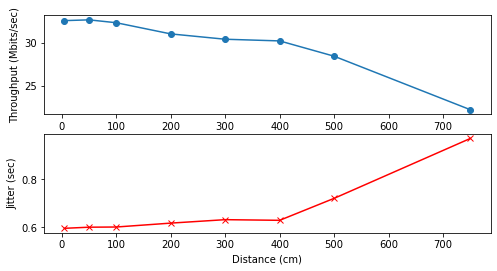

In [15]:
X = [5,50,100,200,300,400,500,750]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(8, 4))
ax1.plot(X, avgThr, marker='o')
ax1.set_xlabel('Distance (cm)')
ax1.set_ylabel('Throughput (Mbits/sec)')


ax2.plot(X, avgJitter, marker='x', color='r')
ax2.set_xlabel('Distance (cm)')
ax2.set_ylabel('Jitter (sec)')
